In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import re
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import levene # statistics models

# Load Dataframe

In [2]:
df = pd.read_csv('Dataset/data_iphone_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           388 non-null    int64 
 1   title_iphone         388 non-null    object
 2   concat_ori_prices    388 non-null    object
 3   discount_prices      388 non-null    object
 4   combined_sold_count  378 non-null    object
 5   nama_toko            388 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.3+ KB


In [3]:
df.head()

,Unnamed: 0,title_iphone,concat_ori_prices,discount_prices,combined_sold_count,nama_toko
0,0,"Apple iPhone 11 64GB, Black",Rp7.999.000,6.999.000,"4,7RB Terjual",ibox_official
1,1,"Apple iPhone 13 128GB, Pink",Rp15.199.000,11.999.000,"1,2RB Terjual",ibox_official
2,2,"Apple iPhone 11 128GB, Black",Rp9.249.000,8.999.000,"5,4RB Terjual",ibox_official
3,3,"Apple iPhone 11 128GB, White",Rp9.249.000,8.999.000,"3,7RB Terjual",ibox_official
4,4,"Apple iPhone 13 128GB, Blue",Rp19.999.000,15.199.000,978 Terjual,ibox_official


In [4]:
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

In [5]:
df.head()

,title_iphone,concat_ori_prices,discount_prices,combined_sold_count,nama_toko
0,"Apple iPhone 11 64GB, Black",Rp7.999.000,6.999.000,"4,7RB Terjual",ibox_official
1,"Apple iPhone 13 128GB, Pink",Rp15.199.000,11.999.000,"1,2RB Terjual",ibox_official
2,"Apple iPhone 11 128GB, Black",Rp9.249.000,8.999.000,"5,4RB Terjual",ibox_official
3,"Apple iPhone 11 128GB, White",Rp9.249.000,8.999.000,"3,7RB Terjual",ibox_official
4,"Apple iPhone 13 128GB, Blue",Rp19.999.000,15.199.000,978 Terjual,ibox_official


# Data Understanding and Data Cleaning

In [6]:
# splitting title

In [7]:
df['title'], df['color'] = df['title_iphone'].str.split(', ', 1).str

In [8]:
df_iphone = df.copy()

In [9]:
# replace
df_iphone['discount_prices'] = df_iphone['discount_prices'].str.replace('.','')

In [10]:
df_iphone['discount_prices'] = df_iphone['discount_prices'].astype(int)

In [11]:
df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title_iphone         388 non-null    object
 1   concat_ori_prices    388 non-null    object
 2   discount_prices      388 non-null    int32 
 3   combined_sold_count  378 non-null    object
 4   nama_toko            388 non-null    object
 5   title                388 non-null    object
 6   color                223 non-null    object
dtypes: int32(1), object(6)
memory usage: 19.8+ KB


In [12]:
df_iphone['title_iphone'].unique()

array(['Apple iPhone 11 64GB, Black', 'Apple iPhone 13 128GB, Pink',
       'Apple iPhone 11 128GB, Black', 'Apple iPhone 11 128GB, White',
       'Apple iPhone 13 128GB, Blue',
       'Apple iPhone 14 Pro 128GB, Space Black',
       'Apple iPhone 13 128GB, Midnight', 'Apple iPhone 14 128GB, Purple',
       'Apple iPhone 14 128GB, Blue', 'Apple iPhone 14 128GB, Starlight',
       'Apple iPhone 12 128GB, Blue', 'Apple iPhone 13 256GB, Pink',
       'Apple iPhone 14 Plus 128GB, Starlight',
       'Apple iPhone 14 Pro Max 256GB, Space Black',
       'Apple iPhone 14 Pro Max 128GB, Space Black',
       'Apple iPhone 13 256GB, Midnight',
       'Apple iPhone 14 128GB, Midnight',
       'Apple iPhone 14 Pro Max 128GB, Deep Purple',
       'Apple iPhone 14 Plus 128GB, Blue',
       'Apple iPhone 14 Pro 256GB, Space Black',
       'Apple iPhone 14 Pro Max 256GB, Deep Purple',
       'Apple iPhone 14 Plus 128GB, Midnight',
       'Apple iPhone 14 Pro Max 256GB, Silver',
       'Apple iPhone 12 

In [13]:
df_iphone = df_iphone[df_iphone['discount_prices'] >= 2000000]

In [14]:
df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 377
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title_iphone         268 non-null    object
 1   concat_ori_prices    268 non-null    object
 2   discount_prices      268 non-null    int32 
 3   combined_sold_count  267 non-null    object
 4   nama_toko            268 non-null    object
 5   title                268 non-null    object
 6   color                150 non-null    object
dtypes: int32(1), object(6)
memory usage: 15.7+ KB


In [15]:
df_iphone['concat_ori_prices'] = df_iphone['concat_ori_prices'].str.replace('Rp','')

In [16]:
df_iphone['concat_ori_prices'] = df_iphone['concat_ori_prices'].str.replace('.','')

In [17]:
# replace 0 values, if ori prices = 0, discount prices is ori prices

In [18]:
# change data type
df_iphone['concat_ori_prices'] = df_iphone['concat_ori_prices'].astype(int)

In [19]:
df_iphone['concat_ori_prices'] = df_iphone['concat_ori_prices'].replace(0, np.nan)

In [20]:
# fillna
df_iphone['concat_ori_prices'].fillna(df_iphone['discount_prices'], inplace=True)

In [21]:
df_iphone.head()

,title_iphone,concat_ori_prices,discount_prices,combined_sold_count,nama_toko,title,color
0,"Apple iPhone 11 64GB, Black",7999000.0,6999000,"4,7RB Terjual",ibox_official,Apple iPhone 11 64GB,Black
1,"Apple iPhone 13 128GB, Pink",15199000.0,11999000,"1,2RB Terjual",ibox_official,Apple iPhone 13 128GB,Pink
2,"Apple iPhone 11 128GB, Black",9249000.0,8999000,"5,4RB Terjual",ibox_official,Apple iPhone 11 128GB,Black
3,"Apple iPhone 11 128GB, White",9249000.0,8999000,"3,7RB Terjual",ibox_official,Apple iPhone 11 128GB,White
4,"Apple iPhone 13 128GB, Blue",19999000.0,15199000,978 Terjual,ibox_official,Apple iPhone 13 128GB,Blue


In [22]:
df_iphone['combined_sold_count'] = df_iphone['combined_sold_count'].str.replace('Terjual','').str.strip()

In [23]:
df_iphone.head()

,title_iphone,concat_ori_prices,discount_prices,combined_sold_count,nama_toko,title,color
0,"Apple iPhone 11 64GB, Black",7999000.0,6999000,"4,7RB",ibox_official,Apple iPhone 11 64GB,Black
1,"Apple iPhone 13 128GB, Pink",15199000.0,11999000,"1,2RB",ibox_official,Apple iPhone 13 128GB,Pink
2,"Apple iPhone 11 128GB, Black",9249000.0,8999000,"5,4RB",ibox_official,Apple iPhone 11 128GB,Black
3,"Apple iPhone 11 128GB, White",9249000.0,8999000,"3,7RB",ibox_official,Apple iPhone 11 128GB,White
4,"Apple iPhone 13 128GB, Blue",19999000.0,15199000,978,ibox_official,Apple iPhone 13 128GB,Blue


In [24]:
df_iphone['sold_count'] = df_iphone['combined_sold_count']

In [25]:
df_iphone['sold_count'] = df_iphone['sold_count'].str.replace('RB','')

In [26]:
df_iphone['sold_count'] = df_iphone['sold_count'].str.replace(',','')

In [27]:
df_iphone['sold_count'] = df_iphone['sold_count'].str.replace('terjual','')

In [28]:
df_iphone['sold_count'] = df_iphone['sold_count'].astype(float)

In [29]:
# get real count

In [30]:
df_iphone['sold_count'] = np.where(df_iphone['combined_sold_count'].str.contains('RB'), df_iphone['sold_count'] * 100, df_iphone['sold_count'])

In [31]:
df_iphone.head()

,title_iphone,concat_ori_prices,discount_prices,combined_sold_count,nama_toko,title,color,sold_count
0,"Apple iPhone 11 64GB, Black",7999000.0,6999000,"4,7RB",ibox_official,Apple iPhone 11 64GB,Black,4700.0
1,"Apple iPhone 13 128GB, Pink",15199000.0,11999000,"1,2RB",ibox_official,Apple iPhone 13 128GB,Pink,1200.0
2,"Apple iPhone 11 128GB, Black",9249000.0,8999000,"5,4RB",ibox_official,Apple iPhone 11 128GB,Black,5400.0
3,"Apple iPhone 11 128GB, White",9249000.0,8999000,"3,7RB",ibox_official,Apple iPhone 11 128GB,White,3700.0
4,"Apple iPhone 13 128GB, Blue",19999000.0,15199000,978,ibox_official,Apple iPhone 13 128GB,Blue,978.0


In [32]:
df_iphone['combined_sold_count'] = df_iphone['combined_sold_count'].fillna(12)

In [33]:
df_iphone['sold_count'] = df_iphone['sold_count'].fillna(12)

In [34]:
df_iphone.rename(columns = {'title_iphone' : 'original_title',
                            'concat_ori_prices' : 'original_prices', 'combined_sold_count' : 'original_sold_count'}, inplace = True)

In [35]:
df_iphone['original_title'] = df_iphone['original_title'].str.replace('GB', 'GB,', regex=False)

In [36]:
df_iphone['original_title'] = df_iphone['original_title'].str.replace(',,', ',', regex=False)

In [37]:
# extract color from original title

In [38]:
df_iphone['color'] = df_iphone['original_title'].str.split(', ', expand=True)[1]

In [39]:
df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 377
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   original_title       268 non-null    object 
 1   original_prices      268 non-null    float64
 2   discount_prices      268 non-null    int32  
 3   original_sold_count  268 non-null    object 
 4   nama_toko            268 non-null    object 
 5   title                268 non-null    object 
 6   color                258 non-null    object 
 7   sold_count           268 non-null    float64
dtypes: float64(2), int32(1), object(5)
memory usage: 17.8+ KB


In [40]:
df_iphone.head()

,original_title,original_prices,discount_prices,original_sold_count,nama_toko,title,color,sold_count
0,"Apple iPhone 11 64GB, Black",7999000.0,6999000,"4,7RB",ibox_official,Apple iPhone 11 64GB,Black,4700.0
1,"Apple iPhone 13 128GB, Pink",15199000.0,11999000,"1,2RB",ibox_official,Apple iPhone 13 128GB,Pink,1200.0
2,"Apple iPhone 11 128GB, Black",9249000.0,8999000,"5,4RB",ibox_official,Apple iPhone 11 128GB,Black,5400.0
3,"Apple iPhone 11 128GB, White",9249000.0,8999000,"3,7RB",ibox_official,Apple iPhone 11 128GB,White,3700.0
4,"Apple iPhone 13 128GB, Blue",19999000.0,15199000,978,ibox_official,Apple iPhone 13 128GB,Blue,978.0


In [41]:
df_iphone['color'].unique()

array(['Black', 'Pink', 'White', 'Blue', 'Space Black', 'Midnight',
       'Purple', 'Starlight', 'Deep Purple', 'Silver', 'Green', 'Gold',
       'Yellow', '(PRODUCT) RED', 'Garansi Resmi',
       'Smartphone Promo Bundling', 'Smartphone Garansi Resmi', None,
       '- Garansi Resmi', 'Promo Bundling', '(PRODUCT)RED', 'Red',
       'Alpine Green', 'Graphite'], dtype=object)

In [42]:
replacements = {
    '- Garansi Resmi': 'No Specific Color',
    'Garansi Resmi': 'No Specific Color',
    'Smartphone Promo Bundling': 'No Specific Color',
    'Smartphone Garansi Resmi': 'No Specific Color',
    'None': 'No Specific Color',
    r'\(PRODUCT\)': '',
    r'\(': '',
    r'\)': '',
    'Promo Bundling': 'No Specific Color',
    'Smartphone No Specific Color': 'No Specific Color',
    'RED': 'Red',
    ' RED' : 'Red',
    'Smartphone No Specific Color' : 'No Specific Color'
}

# Apply all replacements in one pass
df_iphone['color'] = df_iphone['color'].replace(replacements, regex=True)

In [43]:
df_iphone['color'].unique()

array(['Black', 'Pink', 'White', 'Blue', 'Space Black', 'Midnight',
       'Purple', 'Starlight', 'Deep Purple', 'Silver', 'Green', 'Gold',
       'Yellow', ' Red', 'No Specific Color',
       'Smartphone No Specific Color', None, 'Red', 'Alpine Green',
       'Graphite'], dtype=object)

In [44]:
df_iphone['discount_value'] = df_iphone['original_prices'] - df_iphone['discount_prices']

In [45]:
# replace if discount value is -
df_iphone['original_prices'] = np.where(df_iphone['discount_value'] < 0, df_iphone['discount_prices'], df_iphone['original_prices'])

In [46]:
df_iphone['discount_value'] = df_iphone['original_prices'] - df_iphone['discount_prices']

In [47]:
# add new column memory, model and model_full

In [48]:
pattern = r'(\d+)GB'
df_iphone['memory'] = df_iphone['title'].str.extract(pattern, expand = False)

In [49]:
df_iphone.head()

,original_title,original_prices,discount_prices,original_sold_count,nama_toko,title,color,sold_count,discount_value,memory
0,"Apple iPhone 11 64GB, Black",7999000.0,6999000,"4,7RB",ibox_official,Apple iPhone 11 64GB,Black,4700.0,1000000.0,64
1,"Apple iPhone 13 128GB, Pink",15199000.0,11999000,"1,2RB",ibox_official,Apple iPhone 13 128GB,Pink,1200.0,3200000.0,128
2,"Apple iPhone 11 128GB, Black",9249000.0,8999000,"5,4RB",ibox_official,Apple iPhone 11 128GB,Black,5400.0,250000.0,128
3,"Apple iPhone 11 128GB, White",9249000.0,8999000,"3,7RB",ibox_official,Apple iPhone 11 128GB,White,3700.0,250000.0,128
4,"Apple iPhone 13 128GB, Blue",19999000.0,15199000,978,ibox_official,Apple iPhone 13 128GB,Blue,978.0,4800000.0,128


In [50]:
df_iphone['title'].unique()

array(['Apple iPhone 11 64GB', 'Apple iPhone 13 128GB',
       'Apple iPhone 11 128GB', 'Apple iPhone 14 Pro 128GB',
       'Apple iPhone 14 128GB', 'Apple iPhone 12 128GB',
       'Apple iPhone 13 256GB', 'Apple iPhone 14 Plus 128GB',
       'Apple iPhone 14 Pro Max 256GB', 'Apple iPhone 14 Pro Max 128GB',
       'Apple iPhone 14 Pro 256GB', 'Apple iPhone 14 Pro Max 1TB',
       'Apple iPhone 14 Pro 512GB', 'Apple iPhone 14 256GB',
       'Apple iPhone 14 Pro Max 512GB', 'Apple iPhone 14 Plus 256GB',
       'Apple iPhone 14 Pro 1TB', 'Apple iPhone 14 Plus 512GB',
       'Apple iPhone 14 512GB', 'Apple iPhone 13 512GB',
       'Iphone 13 Smartphone 128GB Garansi Resmi',
       'iPhone 11 64GB Garansi Resmi',
       'iPhone 11 64GB Smartphone Promo Bundling',
       'iPhone 13 128GB Smartphone Promo Bundling',
       'iPhone 12 64GB Smartphone Garansi Resmi',
       'iPhone 12 128GB Smartphone Garansi Resmi',
       'iPhone 14 Pro 128GB Smartphone Garansi Resmi',
       'iPhone 14 128GB

In [51]:
df_iphone['original_title'] = df_iphone['original_title'].str.replace('Iphone','iPhone')

In [52]:
df_iphone['title'] = df_iphone['title'].str.replace('Iphone','iPhone')

In [53]:
df_iphone['title'].unique()

array(['Apple iPhone 11 64GB', 'Apple iPhone 13 128GB',
       'Apple iPhone 11 128GB', 'Apple iPhone 14 Pro 128GB',
       'Apple iPhone 14 128GB', 'Apple iPhone 12 128GB',
       'Apple iPhone 13 256GB', 'Apple iPhone 14 Plus 128GB',
       'Apple iPhone 14 Pro Max 256GB', 'Apple iPhone 14 Pro Max 128GB',
       'Apple iPhone 14 Pro 256GB', 'Apple iPhone 14 Pro Max 1TB',
       'Apple iPhone 14 Pro 512GB', 'Apple iPhone 14 256GB',
       'Apple iPhone 14 Pro Max 512GB', 'Apple iPhone 14 Plus 256GB',
       'Apple iPhone 14 Pro 1TB', 'Apple iPhone 14 Plus 512GB',
       'Apple iPhone 14 512GB', 'Apple iPhone 13 512GB',
       'iPhone 13 Smartphone 128GB Garansi Resmi',
       'iPhone 11 64GB Garansi Resmi',
       'iPhone 11 64GB Smartphone Promo Bundling',
       'iPhone 13 128GB Smartphone Promo Bundling',
       'iPhone 12 64GB Smartphone Garansi Resmi',
       'iPhone 12 128GB Smartphone Garansi Resmi',
       'iPhone 14 Pro 128GB Smartphone Garansi Resmi',
       'iPhone 14 128GB

In [54]:
pattern = r'iPhone (Pro|Max|Plus|Pro Max|11|12|13|14).*'
df_iphone['model'] = df_iphone['title'].str.extract(pattern)

In [55]:
# Dictionary to map terms to model names
term_mapping = {
    'Pro Max': 'Pro Max',
    'Pro': 'Pro',
    'Max': 'Max',
    'Plus': 'Plus',
    '14': '14',
    '13': '13',
    '12': '12',
    '11': '11'
}

# Construct a regex pattern from the terms
pattern = r'iPhone (' + '|'.join(re.escape(term) for term in term_mapping.keys()) + ')'

def extract_model_name(title):
    match = re.search(pattern, title)
    if match:
        return f'iPhone {term_mapping[match.group(1)]}'
    return None

df_iphone['model_lengkap'] = df_iphone['title'].apply(extract_model_name)


In [56]:
def extract_model_name(title):
    match = re.search(pattern, title)
    if match:
        model_name = f'iPhone {term_mapping[match.group(1)]}'
        if any(term in title for term in ['Pro', 'Max', 'Plus']):
            model_name += ' ' + ' '.join(term for term in ['Pro', 'Max', 'Plus'] if term in title)
        return model_name
    return None

In [57]:
df_iphone['model_lengkap'] = df_iphone['title'].apply(extract_model_name)

In [58]:
# change type model and memory to int
df_iphone['model'] = df_iphone['model'].astype(float)
df_iphone['memory'] = df_iphone['memory'].astype(float)

In [59]:
df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 377
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   original_title       268 non-null    object 
 1   original_prices      268 non-null    float64
 2   discount_prices      268 non-null    int32  
 3   original_sold_count  268 non-null    object 
 4   nama_toko            268 non-null    object 
 5   title                268 non-null    object 
 6   color                258 non-null    object 
 7   sold_count           268 non-null    float64
 8   discount_value       268 non-null    float64
 9   memory               257 non-null    float64
 10  model                266 non-null    float64
 11  model_lengkap        266 non-null    object 
dtypes: float64(5), int32(1), object(6)
memory usage: 26.2+ KB


In [60]:
df_iphone[df_iphone['memory'].isna()]

,original_title,original_prices,discount_prices,original_sold_count,nama_toko,title,color,sold_count,discount_value,memory,model,model_lengkap
29,"Apple iPhone 14 Pro Max 1TB, Deep Purple",30299000.0,30299000,63,ibox_official,Apple iPhone 14 Pro Max 1TB,Deep Purple,63.0,0.0,NaN,14.0,iPhone 14 Pro Max
41,"Apple iPhone 14 Pro Max 1TB, Space Black",30299000.0,30299000,21,ibox_official,Apple iPhone 14 Pro Max 1TB,Space Black,21.0,0.0,NaN,14.0,iPhone 14 Pro Max
43,"Apple iPhone 14 Pro Max 1TB, Silver",30299000.0,30299000,5,ibox_official,Apple iPhone 14 Pro Max 1TB,Silver,5.0,0.0,NaN,14.0,iPhone 14 Pro Max
45,"Apple iPhone 14 Pro 1TB, Space Black",28299000.0,28299000,10,ibox_official,Apple iPhone 14 Pro 1TB,Space Black,10.0,0.0,NaN,14.0,iPhone 14 Pro
55,"Apple iPhone 14 Pro 1TB, Gold",28299000.0,28299000,12,ibox_official,Apple iPhone 14 Pro 1TB,Gold,12.0,0.0,NaN,14.0,iPhone 14 Pro
56,"Apple iPhone 14 Pro 1TB, Silver",28299000.0,28299000,4,ibox_official,Apple iPhone 14 Pro 1TB,Silver,4.0,0.0,NaN,14.0,iPhone 14 Pro
209,"Apple iPhone 14 Pro Max 1TB, Deep Purple",30299000.0,30299000,6,apple_flagship_store,Apple iPhone 14 Pro Max 1TB,Deep Purple,6.0,0.0,NaN,14.0,iPhone 14 Pro Max
210,"Apple iPhone 14 Pro Max 1TB, Silver",30299000.0,30299000,4,apple_flagship_store,Apple iPhone 14 Pro Max 1TB,Silver,4.0,0.0,NaN,14.0,iPhone 14 Pro Max
219,"Apple iPhone 14 Pro Max 1TB, Space Black",30299000.0,30299000,0 terjual,apple_flagship_store,Apple iPhone 14 Pro Max 1TB,Space Black,0.0,0.0,NaN,14.0,iPhone 14 Pro Max
220,"Apple iPhone 14 Pro 1TB, Gold",28299000.0,28299000,1,apple_flagship_store,Apple iPhone 14 Pro 1TB,Gold,1.0,0.0,NaN,14.0,iPhone 14 Pro


In [61]:
# fillna with 1028
df_iphone['memory'] = df_iphone['memory'].fillna(1024)

In [62]:
df_iphone[df_iphone['memory'].isna()]

,original_title,original_prices,discount_prices,original_sold_count,nama_toko,title,color,sold_count,discount_value,memory,model,model_lengkap


In [63]:
# dropping dataframe when model is mising
df_iphone = df_iphone.dropna(subset=['model'])

In [64]:
df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 377
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   original_title       266 non-null    object 
 1   original_prices      266 non-null    float64
 2   discount_prices      266 non-null    int32  
 3   original_sold_count  266 non-null    object 
 4   nama_toko            266 non-null    object 
 5   title                266 non-null    object 
 6   color                256 non-null    object 
 7   sold_count           266 non-null    float64
 8   discount_value       266 non-null    float64
 9   memory               266 non-null    float64
 10  model                266 non-null    float64
 11  model_lengkap        266 non-null    object 
dtypes: float64(5), int32(1), object(6)
memory usage: 26.0+ KB


In [65]:
df_iphone['color'] = df_iphone['color'].fillna('No Specific Color')

In [66]:
df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 377
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   original_title       266 non-null    object 
 1   original_prices      266 non-null    float64
 2   discount_prices      266 non-null    int32  
 3   original_sold_count  266 non-null    object 
 4   nama_toko            266 non-null    object 
 5   title                266 non-null    object 
 6   color                266 non-null    object 
 7   sold_count           266 non-null    float64
 8   discount_value       266 non-null    float64
 9   memory               266 non-null    float64
 10  model                266 non-null    float64
 11  model_lengkap        266 non-null    object 
dtypes: float64(5), int32(1), object(6)
memory usage: 26.0+ KB


In [67]:
# check descriptive statistics

In [68]:
descriptive = df_iphone.describe()

In [69]:
descriptive

,original_prices,discount_prices,sold_count,discount_value,memory,model
count,2.660000e+02,2.660000e+02,266.000000,2.660000e+02,266.000000,266.000000
mean,2.024577e+07,1.783602e+07,238.962406,2.409759e+06,277.654135,13.439850
std,5.874363e+06,5.472804e+06,734.043008,3.474859e+06,215.104855,0.950745
min,6.999000e+06,6.999000e+06,0.000000,0.000000e+00,64.000000,11.000000
25%,1.599900e+07,1.399900e+07,4.000000,0.000000e+00,128.000000,13.000000
50%,2.089900e+07,1.799900e+07,25.500000,2.750000e+05,256.000000,14.000000
75%,2.429900e+07,2.099900e+07,156.000000,4.150000e+06,256.000000,14.000000
max,3.299900e+07,3.029900e+07,6600.000000,2.000000e+07,1024.000000,14.000000


In [70]:
skewness_1 = 'right_skew'
skewness_2 = 'left skew'
normal = 'normal distribution'

for column in descriptive.columns:
    if descriptive.loc['mean', column] > descriptive.loc['50%', column]:
        print(f"{column} have {skewness_1}")
    elif descriptive.loc['mean', column] < descriptive.loc['50%', column]:
        print(f"{column} have {skewness_2}")
    else:
        print(f"{column} have {normal}")

original_prices have left skew
discount_prices have left skew
sold_count have right_skew
discount_value have right_skew
memory have right_skew
model have left skew


# Statistics and Correlation

## Discount Value and Sold Product

In [71]:
# does there any correlation between discount value(continous) and sold count(discrete)?
sold = df_iphone['sold_count']
discount = df_iphone['discount_value']
h0 = "discount value doesn't have anything to do with number of iphone that being sold"

# spearman correlatiopn
coef, p_value = spearmanr(discount, sold)
print('Spearmans correlation coefficient: %.3f' % coef)
print('P-Value:', p_value)
# interpret the significant
alpha = 0.05

if p_value < alpha:
    print(f"Reject the statement that said {h0}")
else:
    print(f"Fail to Reject the statement that said {h0}")
    
print(f"Based on this, discount value and iPhone that being sold have positive correlation\n",
      "but correlation doesn't imply causation")

Spearmans correlation coefficient: 0.230
P-Value: 0.00015689871239079356
Reject the statement that said discount value doesn't have anything to do with number of iphone that being sold
Based on this, discount value and iPhone that being sold have positive correlation
 but correlation doesn't imply causation


In [72]:
# Normalize discount values
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the discount values to a 2D array for scaling
discount_values = df_iphone['discount_value'].values.reshape(-1, 1)

# Normalize the discount values
normalized_discount = scaler.fit_transform(discount_values)

# Replace the original 'discount' column with normalized values
df_iphone['normalized_discount_value'] = normalized_discount

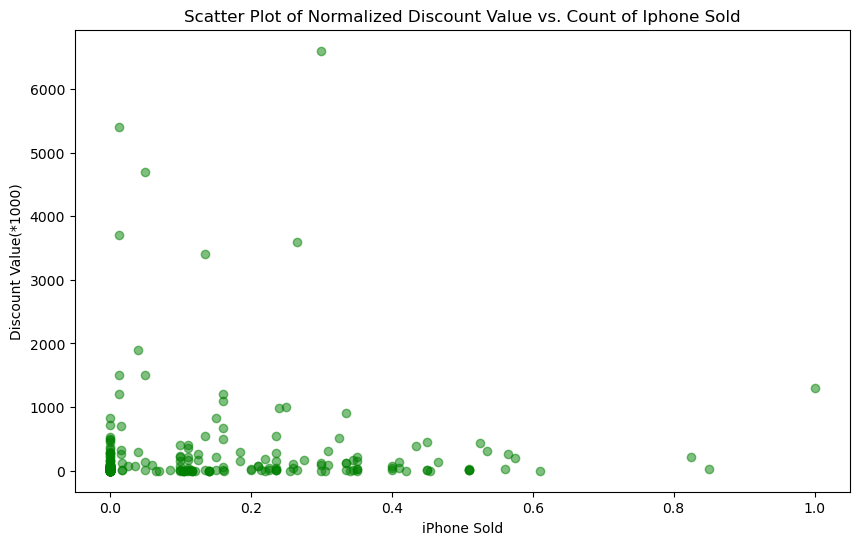

In [73]:
plt.figure(figsize=(10, 6))

x = df_iphone['normalized_discount_value']
y = sold

# Create a categorical scatter plot
plt.scatter(x, y, c='green', alpha = 0.5)

plt.xlabel('iPhone Sold')
plt.ylabel('Discount Value(*1000)')
plt.title('Scatter Plot of Normalized Discount Value vs. Count of Iphone Sold')
plt.show()

## iPhone memory and product being sold

In [74]:
# look corelation between memory(continous) and sold count(discrete)
memory = df_iphone['memory']
sold = df_iphone['sold_count']
h0 = "size of memory doesn't have anything to do with the number of iphone that being sold"

# spearman correlatiopn
coef, p_value = spearmanr(memory, sold)
print('Spearmans correlation coefficient: %.3f' % coef)
print('P-Value:', p_value)
# interpret the significant
alpha = 0.05

if p_value < alpha:
    print(f"Reject the statement that said {h0}")
else:
    print(f"Fail to Reject the statement that said {h0}")
    
print(f"Based on this, memory size and iPhone that being sold have strong negative correlation\n",
      "but correlation doesn't imply causation")

Spearmans correlation coefficient: -0.395
P-Value: 2.3752885411520788e-11
Reject the statement that said size of memory doesn't have anything to do with the number of iphone that being sold
Based on this, memory size and iPhone that being sold have strong negative correlation
 but correlation doesn't imply causation


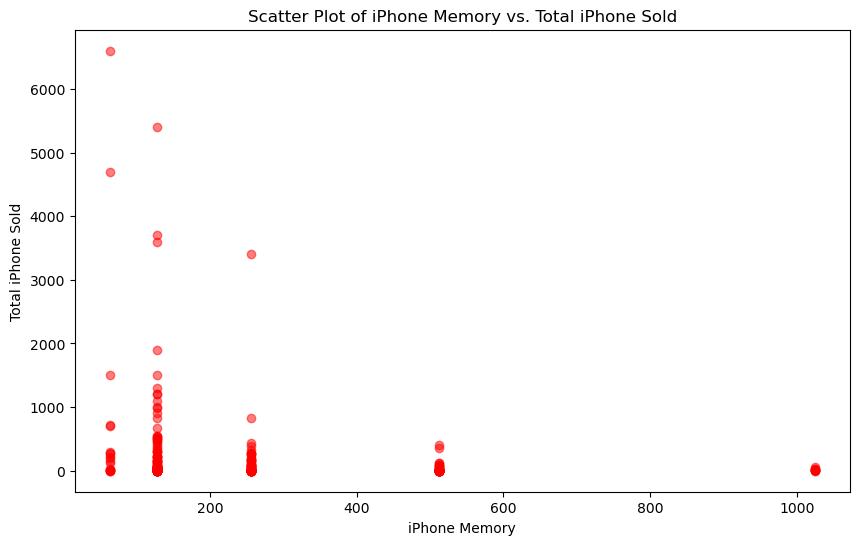

In [75]:
plt.figure(figsize=(10, 6))

x = df_iphone['memory']
y = df_iphone['sold_count']

# Create a categorical scatter plot
plt.scatter(x, y, c='red', alpha = 0.5)

plt.xlabel('iPhone Memory')
plt.ylabel('Total iPhone Sold')
plt.title('Scatter Plot of iPhone Memory vs. Total iPhone Sold')
plt.show()

## iPhone model and discount value

In [76]:
# does there any correlation between model (discrete) and discount value (continuous)
# that's why we using spearman
model = df_iphone['model']
discount = df_iphone['discount_value']
h0 = "iPhone model doesn't have anything to do with small/big of discount value"

# spearman correlatiopn
coef, p_value = spearmanr(model, discount)
print('Spearmans correlation coefficient: %.3f' % coef)
print('P-Value:', p_value)

# interpret the significant
alpha = 0.05

if p_value < alpha:
    print(f"Reject the statement that said {h0}")
else:
    print(f"Fail to Reject the statement that said {h0}")
    
print(f"Based on this, model and discount value have negative correlation\n",
      "but correlation doesn't imply causation")

Spearmans correlation coefficient: -0.184
P-Value: 0.0026577753358469555
Reject the statement that said iPhone model doesn't have anything to do with small/big of discount value
Based on this, model and discount value have negative correlation
 but correlation doesn't imply causation


In [77]:
# Normalize discount values
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the discount values to a 2D array for scaling
discount_values = df_iphone['discount_value'].values.reshape(-1, 1)

# Normalize the discount values
normalized_discount = scaler.fit_transform(discount_values)

# Replace the original 'discount' column with normalized values
df_iphone['normalized_discount_value'] = normalized_discount

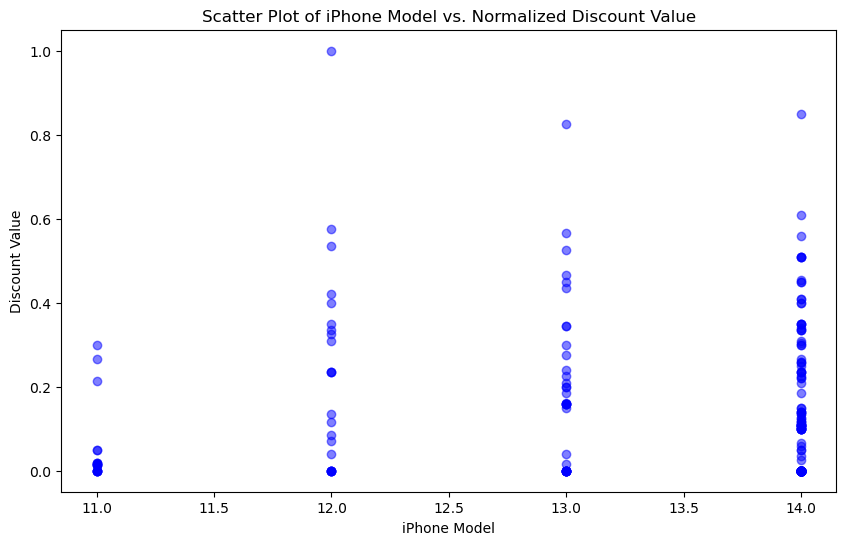

In [78]:
plt.figure(figsize=(10, 6))

x = df_iphone['model']
y = df_iphone['normalized_discount_value']

# Create a categorical scatter plot
plt.scatter(x, y, c='blue', alpha = 0.5)

plt.xlabel('iPhone Model')
plt.ylabel('Discount Value')
plt.title('Scatter Plot of iPhone Model vs. Normalized Discount Value')
plt.show()

## memory and discount value

In [79]:
# look corelation between memory(continous) and discount value(continous)
"""Based on Central Limit Theorem, more higher sample size means distribution data will be closer to normal, but,
because our data is not big, we perform transformation so we can get normal distribution for our data and can perform pearson's
correlation"""

# transform our data first
df_iphone['memory_log'] = np.log(df_iphone['memory'])
df_iphone['discount_value_log'] = np.log(df_iphone['discount_value'])

In [80]:
# Replace -inf values with NaN
df_iphone.replace(-np.inf, np.nan, inplace=True)

In [81]:
mean_discount_log = df_iphone['discount_value_log'].mean()
df_iphone['discount_value_log'].fillna(mean_discount_log, inplace=True)

In [82]:
# perform pearson correlation
memory_log = df_iphone['memory_log']
discount_value_log = df_iphone['discount_value_log']
h0 = 'memory size have nothing to do with how much discount in iPhone'

correlation, p_value = pearsonr(memory_log, discount_value_log)
print("Pearson correlation:", correlation)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print(f"Reject statements that said {h0}")
else:
    print(f"Fail to Reject statements that said {h0}")

Pearson correlation: 0.15973106614340682
P-value: 0.009063685785593916
Reject statements that said memory size have nothing to do with how much discount in iPhone


## Discount Value and Original Prices

In [83]:
# transformation first, to make them have normal distribution
df_iphone['discount_value_log'] = np.log(df_iphone['discount_value'])
df_iphone['original_prices_log'] = np.log(df_iphone['original_prices'])

In [84]:
# Replace -inf values with NaN
df_iphone.replace(-np.inf, np.nan, inplace=True)

In [85]:
mean_discount_log = df_iphone['discount_value_log'].mean()
df_iphone['discount_value_log'].fillna(mean_discount_log, inplace=True)

In [86]:
# perform pearson correlation
discount_log = df_iphone['discount_value_log']
original_prices_log = df_iphone['original_prices_log'] 
h0 = 'original prices have nothing to do with how much discount in iPhone'

correlation, p_value = pearsonr(original_prices_log, discount_log)
print("Pearson correlation:", correlation)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print(f"Reject statements that said {h0}")
else:
    print(f"Fail to Reject statements that said {h0}")

Pearson correlation: 0.5312029008978962
P-value: 9.031047592285783e-21
Reject statements that said original prices have nothing to do with how much discount in iPhone


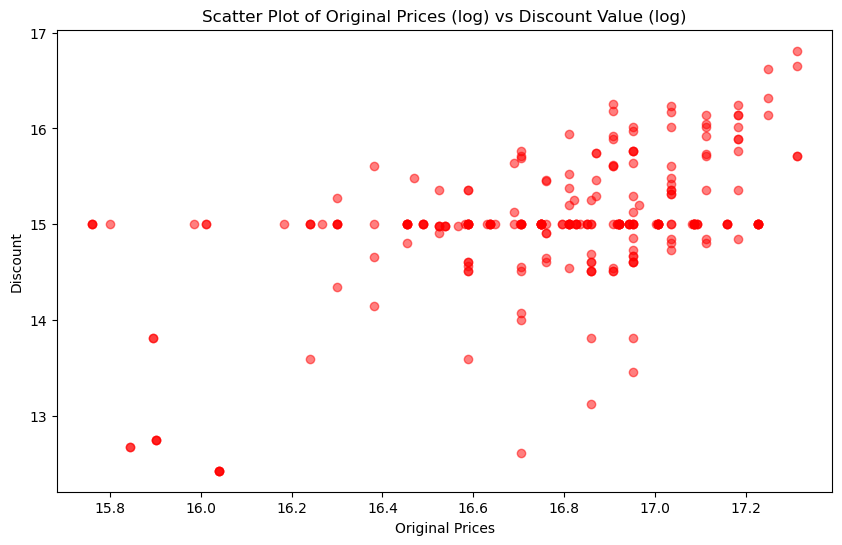

In [87]:
plt.figure(figsize=(10, 6))

x = original_prices_log
y = discount_log

# Create a categorical scatter plot
plt.scatter(x, y, c='red', alpha = 0.5)

plt.xlabel('Original Prices')
plt.ylabel('Discount')
plt.title('Scatter Plot of Original Prices (log) vs Discount Value (log)')
plt.show()

In [88]:
df_iphone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 377
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   original_title             266 non-null    object 
 1   original_prices            266 non-null    float64
 2   discount_prices            266 non-null    int32  
 3   original_sold_count        266 non-null    object 
 4   nama_toko                  266 non-null    object 
 5   title                      266 non-null    object 
 6   color                      266 non-null    object 
 7   sold_count                 266 non-null    float64
 8   discount_value             266 non-null    float64
 9   memory                     266 non-null    float64
 10  model                      266 non-null    float64
 11  model_lengkap              266 non-null    object 
 12  normalized_discount_value  266 non-null    float64
 13  memory_log                 266 non-null    float64

In [89]:
df_iphone = df_iphone.drop(columns = ['discount_value_log'], axis = 1)

In [90]:
df_iphone = df_iphone.drop(columns = ['normalized_discount_value'], axis = 1)

In [91]:
df_iphone = df_iphone.drop(columns = ['original_prices_log'], axis = 1)

In [92]:
df_iphone = df_iphone.drop(columns = ['memory_log'], axis = 1)

In [93]:
# ANOVA Test model lengkap, color, discount prices
from scipy.stats import f_oneway
h0 = 'There is no significant difference in prices between groups'
grouped_data = []
for group, group_data in df_iphone.groupby(['model_lengkap','color']):
    grouped_data.append(group_data['discount_prices'])
    
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_data)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"Reject statements: {h0}")
else:
    print(f"Fail to Reject statements: {h0}")

F-statistic: 15.238387244014815
P-value: 6.0188867940214695e-49
Reject statements: There is no significant difference in prices between groups


# Categorical Data

In [94]:
df_object = pd.DataFrame()

In [95]:
for column in df_iphone.columns:
    if df_iphone[column].dtype == 'object':
        df_object[column] = df_iphone[column]

In [96]:
df_object.describe()

,original_title,original_sold_count,nama_toko,title,color,model_lengkap
count,266,266,266,266,266,266
unique,137,137,7,131,19,11
top,"Apple iPhone 11 64GB, Black",0 terjual,digimap,Apple iPhone 14 Plus 256GB,No Specific Color,iPhone 14 Pro Max
freq,4,33,73,14,33,52


In [97]:
# check distribution of model iPhone
distribution_type = df_iphone.groupby(['model_lengkap']).size().reset_index(name = 'count')
distribution_type = distribution_type.sort_values('count', ascending = False)

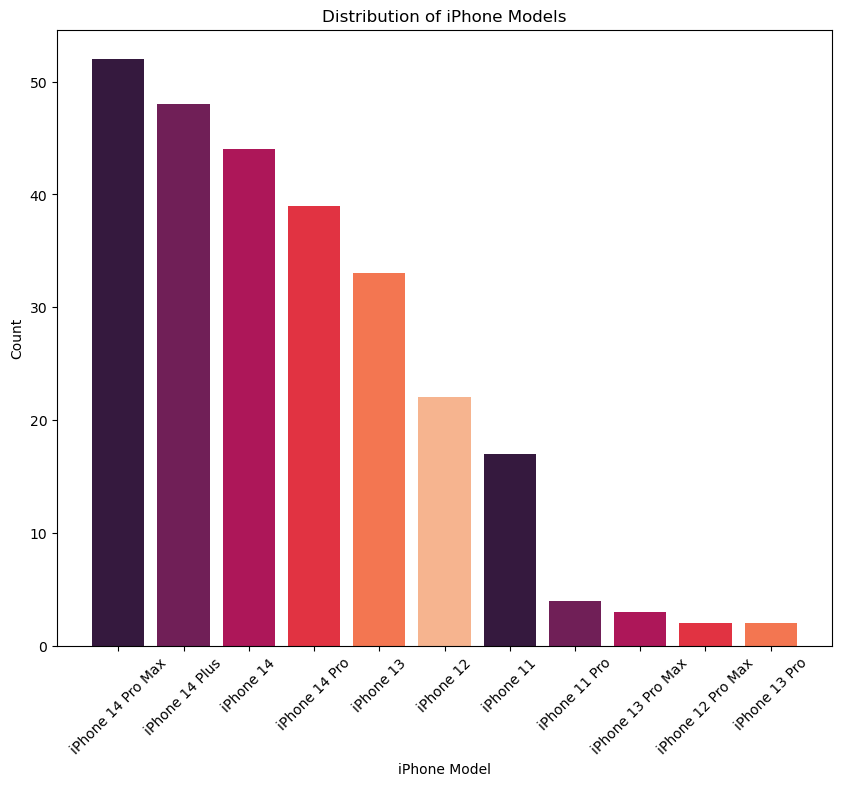

In [98]:
# plot

plt.figure(figsize=(10,8))

x = distribution_type['model_lengkap']
y = distribution_type['count']

# color palette
color_palette = sns.color_palette("rocket")

plt.bar(x,y, color=color_palette)

plt.xticks(rotation=45)
plt.xlabel('iPhone Model')
plt.ylabel('Count')
plt.title('Distribution of iPhone Models')
plt.show()

In [99]:
df_iphone['color'].unique()

array(['Black', 'Pink', 'White', 'Blue', 'Space Black', 'Midnight',
       'Purple', 'Starlight', 'Deep Purple', 'Silver', 'Green', 'Gold',
       'Yellow', ' Red', 'No Specific Color',
       'Smartphone No Specific Color', 'Red', 'Alpine Green', 'Graphite'],
      dtype=object)

In [100]:
# distribution of iPhone Color
color_distribution = df_iphone.groupby(['color']).size().reset_index(name = 'count')
color_rank = color_distribution.sort_values('count', ascending = False)

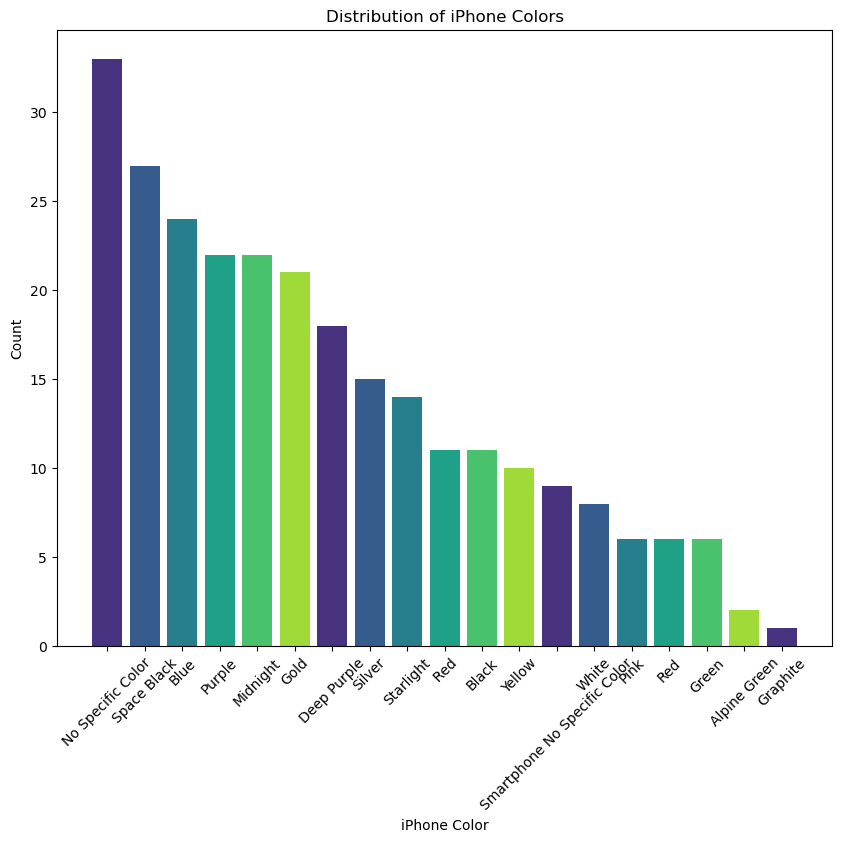

In [101]:
# plot

plt.figure(figsize=(10,8))

x = color_rank['color']
y = color_rank['count']

# color palette
color_palette = sns.color_palette("viridis")

plt.bar(x,y, color=color_palette)

plt.xticks(rotation=45)
plt.xlabel('iPhone Color')
plt.ylabel('Count')
plt.title('Distribution of iPhone Colors')
plt.show()

In [102]:
# Distribution of Models + Color
models_color = df_iphone.groupby(['model','color']).size().reset_index(name = 'count')

In [103]:
models_distri = models_color.sort_values('count', ascending = False)

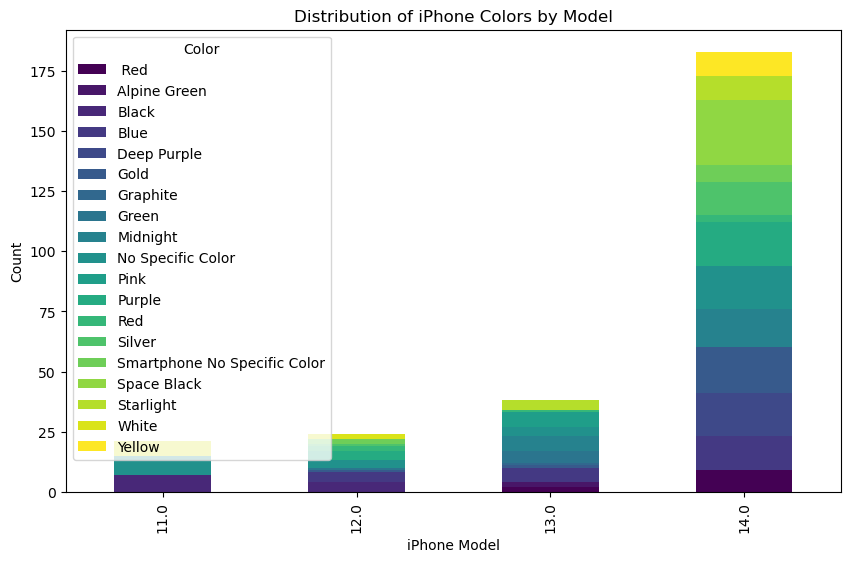

In [104]:
# Pivot the DataFrame to have 'model' as index, 'color' as columns, and 'count' as values
pivot_df = models_distri.pivot(index='model', columns='color', values='count')

# Create a stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.xlabel('iPhone Model')
plt.ylabel('Count')
plt.title('Distribution of iPhone Colors by Model')
plt.legend(title='Color')
plt.show()

In [105]:
df_iphone

,original_title,original_prices,discount_prices,original_sold_count,nama_toko,title,color,sold_count,discount_value,memory,model,model_lengkap
0,"Apple iPhone 11 64GB, Black",7999000.0,6999000,"4,7RB",ibox_official,Apple iPhone 11 64GB,Black,4700.0,1000000.0,64.0,11.0,iPhone 11
1,"Apple iPhone 13 128GB, Pink",15199000.0,11999000,"1,2RB",ibox_official,Apple iPhone 13 128GB,Pink,1200.0,3200000.0,128.0,13.0,iPhone 13
2,"Apple iPhone 11 128GB, Black",9249000.0,8999000,"5,4RB",ibox_official,Apple iPhone 11 128GB,Black,5400.0,250000.0,128.0,11.0,iPhone 11
3,"Apple iPhone 11 128GB, White",9249000.0,8999000,"3,7RB",ibox_official,Apple iPhone 11 128GB,White,3700.0,250000.0,128.0,11.0,iPhone 11
4,"Apple iPhone 13 128GB, Blue",19999000.0,15199000,978,ibox_official,Apple iPhone 13 128GB,Blue,978.0,4800000.0,128.0,13.0,iPhone 13
...,...,...,...,...,...,...,...,...,...,...,...,...
373,"Apple iPhone 14 Pro Max 512GB, Space Black",26499000.0,26499000,8,digimap,Apple iPhone 14 Pro Max 512GB Space Black,Space Black,8.0,0.0,512.0,14.0,iPhone 14 Pro Max
374,"Apple iPhone 13 Pro 128GB, Alpine Green",16999000.0,16999000,58,digimap,Apple iPhone 13 Pro 128GB Alpine Green,Alpine Green,58.0,0.0,128.0,13.0,iPhone 13 Pro
375,"Apple iPhone 12 128GB, Green",17699000.0,11499000,308,digimap,Apple iPhone 12 128GB Green,Green,308.0,6200000.0,128.0,12.0,iPhone 12
376,"Apple iPhone 13 256GB, Green",21199000.0,14299000,172,digimap,Apple iPhone 13 256GB Green,Green,172.0,6900000.0,256.0,13.0,iPhone 13


In [106]:
pd.options.display.float_format = '{:.0f}'.format

In [107]:
# Average Prices of iPhone by their model
average_prices = df_iphone.groupby(['model_lengkap']).agg({'discount_prices' : 'mean'}).reset_index()

In [108]:
average_prices

,model_lengkap,discount_prices
0,iPhone 11,7969941
1,iPhone 11 Pro,7703000
2,iPhone 12,11278091
3,iPhone 12 Pro Max,20999000
4,iPhone 13,14453545
5,iPhone 13 Pro,14711000
6,iPhone 13 Pro Max,19699000
7,iPhone 14,16762182
8,iPhone 14 Plus,18292750
9,iPhone 14 Pro,22155923


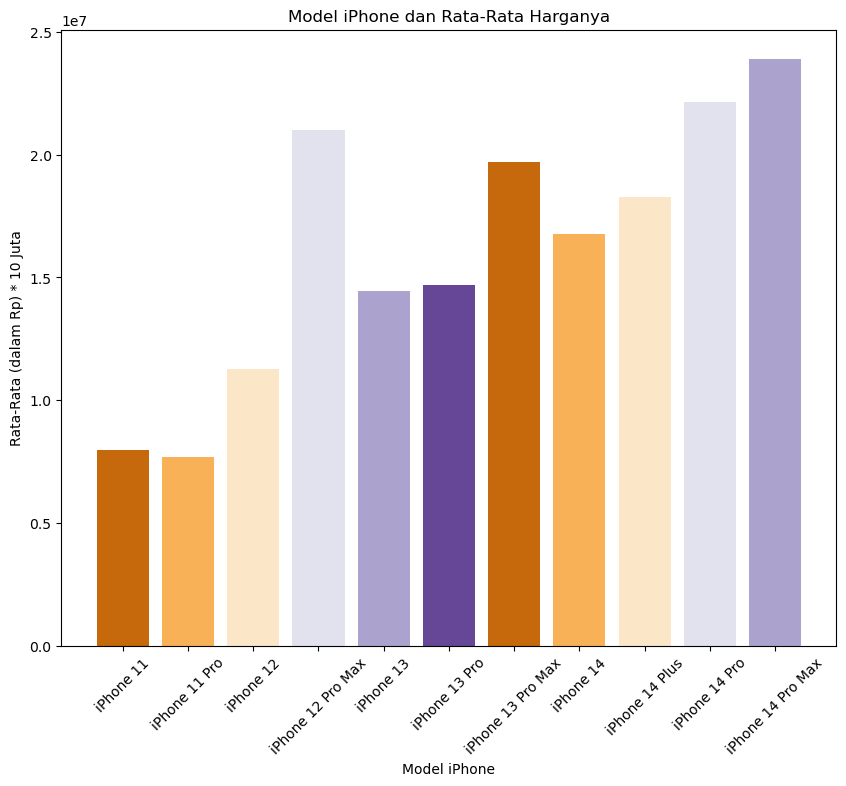

In [109]:
# plot

plt.figure(figsize=(10,8))

x = average_prices['model_lengkap']
y = average_prices['discount_prices']

color_palette = sns.color_palette("PuOr")

plt.bar(x,y, color = color_palette)
plt.title('Model iPhone dan Rata-Rata Harganya')
plt.xlabel('Model iPhone')
plt.ylabel('Rata-Rata (dalam Rp) * 10 Juta')
plt.xticks(rotation=45)
plt.show()

In [110]:
# Average Prices of iPhone by their model danb toko
average_toko = df_iphone.groupby(['nama_toko','model_lengkap']).agg({'discount_prices' : 'mean'}).reset_index()

In [111]:
average_toko.head(10)

,nama_toko,model_lengkap,discount_prices
0,apple_flagship_store,iPhone 11,7999000
1,apple_flagship_store,iPhone 12,11299000
2,apple_flagship_store,iPhone 13,14199000
3,apple_flagship_store,iPhone 14,16632333
4,apple_flagship_store,iPhone 14 Plus,17814385
5,apple_flagship_store,iPhone 14 Pro,23011500
6,apple_flagship_store,iPhone 14 Pro Max,24537462
7,apple_teleshop_global,iPhone 11,7279000
8,apple_teleshop_global,iPhone 11 Pro,7703000
9,apple_teleshop_global,iPhone 12,11134000


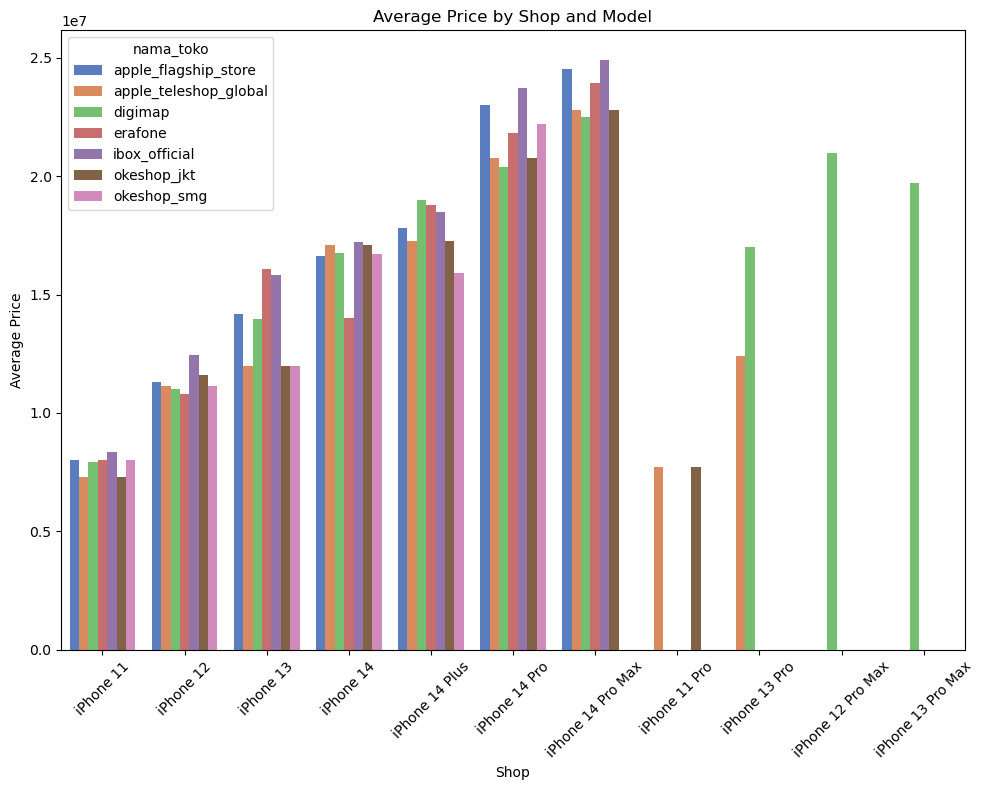

In [112]:
# Create a bar chart with hue using seaborn
plt.figure(figsize=(10, 8))
custom_palette = sns.color_palette('muted')
sns.barplot(data=average_toko, x='model_lengkap', y='discount_prices', hue='nama_toko', palette = custom_palette)
plt.xlabel('Shop')
plt.ylabel('Average Price')
plt.title('Average Price by Shop and Model')
plt.xticks(rotation=45)
plt.tight_layout()

In [113]:
# Average Prices of iPhone by their model
average_color = df_iphone.groupby(['model_lengkap','color']).agg({'discount_prices' : 'mean'}).reset_index()

In [114]:
average_color.head()

,model_lengkap,color,discount_prices
0,iPhone 11,Black,7856143
1,iPhone 11,No Specific Color,7650500
2,iPhone 11,White,8315667
3,iPhone 11 Pro,No Specific Color,7703000
4,iPhone 12,Black,11524000


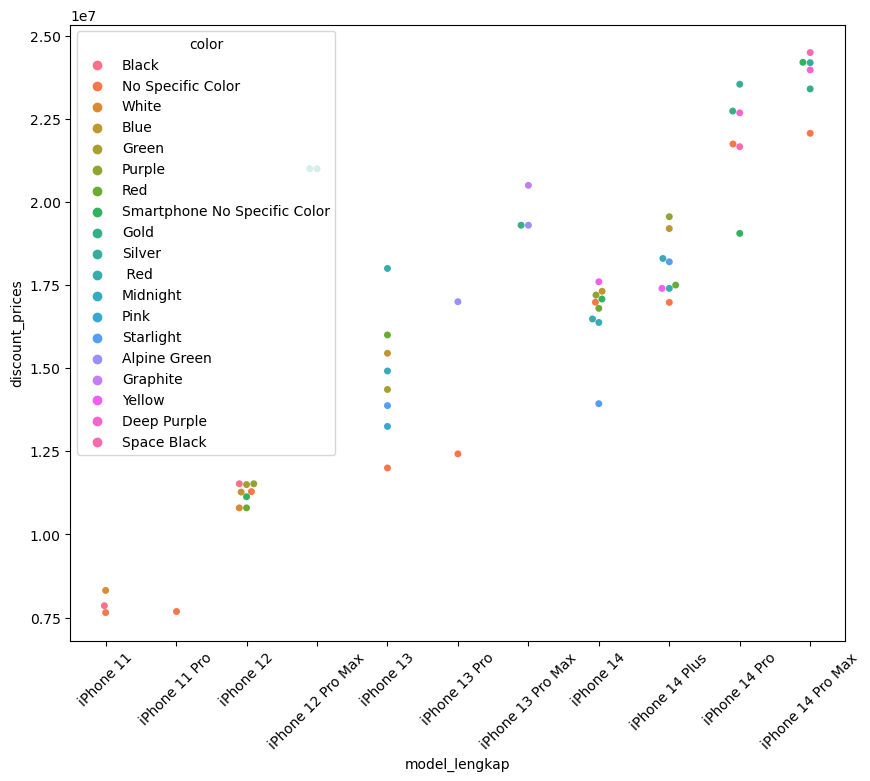

In [115]:
x = average_color['model_lengkap']
y = average_color['discount_prices']
hue = average_color['color']
# violin plot
plt.figure(figsize=(10,8))
sns.swarmplot(x = x, y = y, hue = hue)
plt.xticks(rotation=45)
plt.show()

In [116]:
df_iphone

,original_title,original_prices,discount_prices,original_sold_count,nama_toko,title,color,sold_count,discount_value,memory,model,model_lengkap
0,"Apple iPhone 11 64GB, Black",7999000,6999000,"4,7RB",ibox_official,Apple iPhone 11 64GB,Black,4700,1000000,64,11,iPhone 11
1,"Apple iPhone 13 128GB, Pink",15199000,11999000,"1,2RB",ibox_official,Apple iPhone 13 128GB,Pink,1200,3200000,128,13,iPhone 13
2,"Apple iPhone 11 128GB, Black",9249000,8999000,"5,4RB",ibox_official,Apple iPhone 11 128GB,Black,5400,250000,128,11,iPhone 11
3,"Apple iPhone 11 128GB, White",9249000,8999000,"3,7RB",ibox_official,Apple iPhone 11 128GB,White,3700,250000,128,11,iPhone 11
4,"Apple iPhone 13 128GB, Blue",19999000,15199000,978,ibox_official,Apple iPhone 13 128GB,Blue,978,4800000,128,13,iPhone 13
...,...,...,...,...,...,...,...,...,...,...,...,...
373,"Apple iPhone 14 Pro Max 512GB, Space Black",26499000,26499000,8,digimap,Apple iPhone 14 Pro Max 512GB Space Black,Space Black,8,0,512,14,iPhone 14 Pro Max
374,"Apple iPhone 13 Pro 128GB, Alpine Green",16999000,16999000,58,digimap,Apple iPhone 13 Pro 128GB Alpine Green,Alpine Green,58,0,128,13,iPhone 13 Pro
375,"Apple iPhone 12 128GB, Green",17699000,11499000,308,digimap,Apple iPhone 12 128GB Green,Green,308,6200000,128,12,iPhone 12
376,"Apple iPhone 13 256GB, Green",21199000,14299000,172,digimap,Apple iPhone 13 256GB Green,Green,172,6900000,256,13,iPhone 13
